# Quiz 04 - Kendall Gilbert
## Using Zonal Statistics to Evaluate Air Quality during the Woolsey Fire

In previous assignments you have worked with Sentinel-2 data. Today you will work with a different satellite in the Sentinel cluster: Sentinel 5P. One calculated parameter from Sentinel-5p is something call the Aerosol Index. The Aerosol Index (AI) is a qualitative index indicating the presence of elevated layers of aerosols with significant absorption. The main aerosol types that cause signals detected in the AI are desert dust, biomass burning and volcanic ash plumes. An advantage of the AI is that it can be derived for clear as well as (partly) cloudy ground pixels.

Let's revisit some air quality data from November 9th, 2018 - the day after the Woolsey fire started. You are provided the AI from Sentinel-5P (```data/2018-11-09-00_00_2018-11-09-23_59_Sentinel-5P_AER_AI_AER_AI_340_380_(Raw).tiff```) for the following area of interest:

![_._](data/aoi.png)


Complete and answer the following questions:
1. Load the AI data for November 9th, 2018 (```data/2018-11-09-00_00_2018-11-09-23_59_Sentinel-5P_AER_AI_AER_AI_340_380_(Raw).tiff```) and visualize (if using ```rasterio``` you can use the command ```show(ai_data)``` to plot, or ```ai_data.plot()``` if using rioxarray), including a colormap (```cmap```) that makes sense for this visualization (https://matplotlib.org/stable/tutorials/colors/colormaps.html). What patterns do you see?

In [9]:
import rasterio
from rasterio.plot import show
from rasterstats import zonal_stats
import osmnx as ox
import geopandas as gpd
import os
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap, BoundaryNorm
import rioxarray as rxr
import xarray as xr

In [20]:
AI_Data = rxr.open_rasterio('data/2018-11-09-00_00_2018-11-09-23_59_Sentinel-5P_AER_AI_AER_AI_340_380_(Raw).tiff', masked = True)

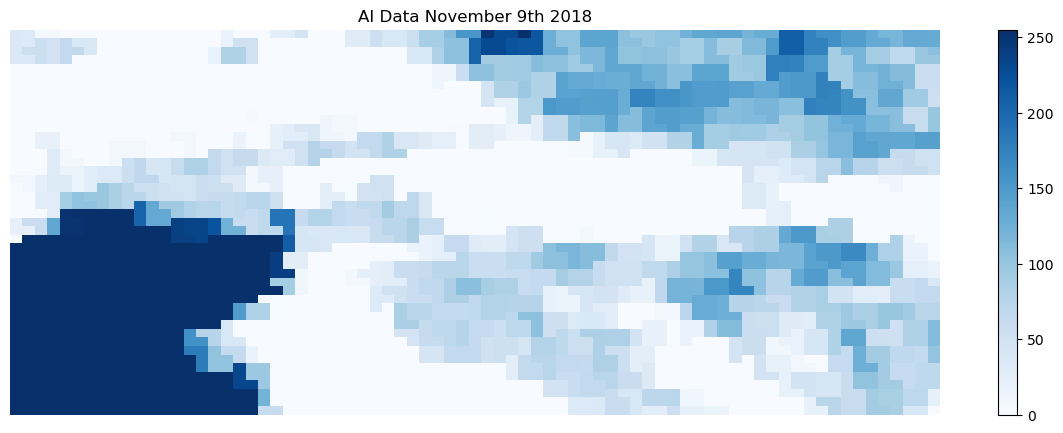

In [47]:
#Plot data
f, (ax1) = plt.subplots(1,1, figsize=(15, 5))
AI_Data.plot(cmap='Blues', ax=ax1)
ax1.set(title="AI Data November 9th 2018")
ax1.set_axis_off()
plt.show()

Some patterns I notice are that there is higher AI inland from the coast than on the coast. I also notice that the bottom left of the data has very high AI, which is likely over part of the ocean. It also seems that there is higher AI in the north than the south of the map.

2. Select two areas within the above area of interest box which is roughly around LA county. For example, we used the cities of Topanga and San Fernando in class last week. Select two different cities of your choice, and retrieve their geometries using the ```osmnx``` package. If you're not familiar with city names in LA county, go to Google Maps. 

In [26]:
# Keywords in such format that they can be found from OSM
long_beach_q = "Long Beach, California, United States of America"
riverside_q = "Riverside, California, United States of America"

# Retrieve the geometries of those areas using osmnx
long_beach = ox.geocode_to_gdf(long_beach_q)
riverside = ox.geocode_to_gdf(riverside_q)

3. Plot the retrieved polygons over the AI data to make sure both are within bounds of the AI data.

In [31]:
# Reproject to same coordinate system as the AI data
long_beach = long_beach.to_crs(crs=AI_Data.rio.crs)
riverside = riverside.to_crs(crs=AI_Data.rio.crs)

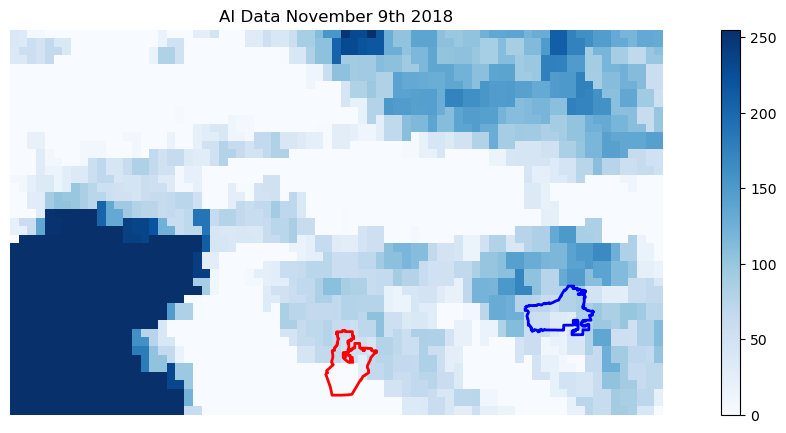

In [33]:
#Plot data with polygons for cities on top
f, (ax1) = plt.subplots(1,1, figsize=(15, 5))
AI_Data.plot(cmap='Blues', ax=ax1)
long_beach.plot(facecolor='None', edgecolor='red', linewidth=2, ax=ax1)
riverside.plot(facecolor='None', edgecolor='blue', linewidth=2, ax=ax1)
ax1.set(title="AI Data November 9th 2018")
ax1.set_axis_off()
plt.show()

4. Calculate the zonal statistics of both cities you selected, and display the max AI values for both cities. Which city had the higher AI? Does this coincide with what you visually observe?

In [37]:
#Reload data using rasterio
Rasterio_AI_Data = rasterio.open('data/2018-11-09-00_00_2018-11-09-23_59_Sentinel-5P_AER_AI_AER_AI_340_380_(Raw).tiff')

# Read the raster values from the AI Data as a numpy array
AI_Data_array = Rasterio_AI_Data.read(1)

# Get the affine of the AI Data
AI_Data_affine = Rasterio_AI_Data.transform

In [38]:
# Calculate zonal statistics for Long beach
zs_long_beach = zonal_stats(long_beach, AI_Data_array, affine=AI_Data_affine, stats=['min', 'max', 'mean', 'median', 'majority'])

# Calculate zonal statistics for Riverside
zs_riverside = zonal_stats(riverside, AI_Data_array, affine=AI_Data_affine, stats=['min', 'max', 'mean', 'median', 'majority'])

/opt/tljh/user/lib/python3.9/site-packages/rasterstats/io.py:335: NodataWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn(


In [50]:
print('Long Beach Zonal Statistics:', zs_long_beach)
print('Riverside Zonal Statistics:', zs_riverside)

Long Beach Zonal Statistics: [{'min': 0.0, 'max': 66.0, 'mean': 23.08695652173913, 'median': 0.0, 'majority': 0.0}]
Riverside Zonal Statistics: [{'min': 28.0, 'max': 87.0, 'mean': 62.666666666666664, 'median': 73.0, 'majority': 80.0}]


Riverside has higher AI than Long Beach. Yes this coincides with what I observe visually since the cells in Riverside are darker blue.